In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_14194/831503919.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']
/var/folders/8v/5czrtjp134z_qn6j_jsmrnl80000gn/T/ipykernel_14194/831503919.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


In [2]:
# Change if required
folder = "../experiments/2022-11-14-16-58_BanditStatic_"
dataset = "Static"

In [3]:
masterdata = pd.read_csv("%s/BanditStatic.csv"%folder, sep=",")
narms = masterdata.iloc[0]['k']

In [4]:
sorted(masterdata.bandit.unique())

['ImpCPD',
 'ImpCPD2',
 'ImpCPD3',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false',
 'MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true',
 'MP-ADS-KL-UCB

In [5]:
masterdata.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration'],
      dtype='object')

In [6]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [7]:
masterdata.shape

(950000, 8)

In [8]:
masterdata.groupby(["scalingstrategy", "bandit"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain    k  \
scalingstrategy bandit                                                    
No-1            ImpCPD                                    0.917559  1.0   
                ImpCPD2                                   0.901881  1.0   
                ImpCPD3                                   0.901881  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001    0.785813  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01     0.780664  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1      0.652862  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12  0.785991  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-15  0.785844  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4   0.786087  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5   0.786120  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6   0.785899  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-7   0.786211  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-8   0.786056  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=false    0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true     0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false     0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=true      0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=false      0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.1; r=true       0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=false  0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-12; r=true   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=false  0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=true    0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=false   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=true    0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=false   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-6; r=true    0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=false   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=true    0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=false   0.990100  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-8; r=true    0.990100  1.0   
                MP-ADS-TS-ADWIN1; d=0.001; r=false        0.988596  1.0   
                MP-ADS-TS-ADWIN1; d=0.001; r=true         0.988573  1.0   
                MP-ADS-TS-ADWIN1; d=0.01; r=false         0.988676  1.0   
                MP-ADS-TS-ADWIN1; d=0.01; r=true          0.988712  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=false          0.988340  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=true           0.987158  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=false      0.988593  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=true       0.988702  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=false      0.988648  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=true       0.988829  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=false       0.988712  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true        0.988755  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=false       0.988753  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true        0.988604  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-6; r=false       0.988695  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-6; r=true        0.988700  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-7; r=false       0.988648  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-7; r=true        0.988699  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-8; r=false       0.988581  1.0   
            

In [24]:
masterdata.groupby(["scalingstrategy", "bandit"])[['gain', 'k', 'reward/arm', 'cputime']].mean().sort_values("cputime")

gain    k  \
scalingstrategy bandit                                                    
No-1            OS                                        1.000000  1.0   
                MP-M-UCB; w=1000; m=10                    0.505327  1.0   
                MP-SW-UCB; w=5000                         0.849527  1.0   
                OR                                        0.505003  1.0   
                MP-E-G; e=0.8                             0.891840  1.0   
                MP-M-UCB; w=5000; m=100                   0.505327  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001    0.785813  1.0   
                MP-SW-UCB#-G; ka=0.1; l=4.3               0.504362  1.0   
                MP-E-G; e=0.7                             0.843226  1.0   
                MP-E-G; e=0.99                            0.985162  1.0   
                MP-M-UCB; w=5000; m=10                    0.505327  1.0   
                MP-SW-UCB#-G; ka=0.2; l=4.3               0.504742  1.0   
                MP-M-UCB; w=1000; m=100                   0.505327  1.0   
                MP-SW-UCB; w=100                          0.504001  1.0   
                MP-E-G; e=0.9                             0.940740  1.0   
                MP-SW-TS; w=500                           0.832414  1.0   
                MP-SW-TS; w=1000                          0.909144  1.0   
                MP-D-TS; g=0.7                            0.096436  1.0   
                MP-ADS-TS-ADWIN1; d=0.01; r=false         0.988676  1.0   
                MP-TS                                     0.988642  1.0   
                OD                                        1.000000  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=false          0.988340  1.0   
                MP-D-TS; g=0.8                            0.131346  1.0   
                MP-SW-UCB; w=500                          0.673163  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-5; r=false   0.990100  1.0   
                MP-KLUCB                                  0.990100  1.0   
                MP-D-TS; g=0.999                          0.945482  1.0   
                MP-SW-UCB; w=1000                         0.756680  1.0   
                MP-GLR-KL-UCB-G                           0.506628  1.0   
                MP-D-TS; g=0.9                            0.217676  1.0   
                MP-D-TS; g=0.99                           0.709798  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1      0.652862  1.0   
                MP-SW-UCB#-A; nu=0.1; l=12.3              0.605384  1.0   
                MP-SW-UCB#-A; nu=0.2; l=12.3              0.586924  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-15; r=true       0.988829  1.0   
                MP-GLR-KL-UCB-L                           0.435767  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-6   0.785899  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true        0.988755  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-15; r=true   0.990100  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01     0.780664  1.0   
                MP-SW-TS; w=5000                          0.982477  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true        0.988604  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=false   0.990100  1.0   
                MP-SW-TS; w=100                           0.619672  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=0.01; r=false     0.990100  1.0   
                MP-ADS-TS-ADWIN1; d=0.1; r=true           0.987158  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-4; r=false   0.990100  1.0   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-12  0.785991  1.0   
                MP-RExp3; b=500.0                         0.514609  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-12; r=true       0.988702  1.0   
                MP-ADS-TS-ADWIN1; d=1.0E-8; r=false       0.988581  1.0   
                MP-ADS-KL-UCB-ADWIN1; d=1.0E-7; r=true    0.990100  1.0   
            

In [9]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,950000.0,950000.000000,950000.000000,950000.000000,950000.000000
mean,1.0,0.826000,0.511930,4999.500000,0.826000
std,0.0,0.236268,1.140995,2886.752851,0.236268
min,1.0,0.000000,0.003600,0.000000,0.000000
25%,1.0,0.710000,0.248600,2499.750000,0.710000
50%,1.0,0.950000,0.421300,4999.500000,0.950000
75%,1.0,1.000000,0.681600,7499.250000,1.000000
max,1.0,1.000000,548.962800,9999.000000,1.000000


In [25]:
masterdata['dataset'].unique()

array(['StaticGenerator-100'], dtype=object)

In [17]:
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
markers = [
#    '.',
#    ',',
    'v',
    'o',
    '^',
    '<',
    '>',
#    '1',
#    '2',
#    '3',
#    '4',
#    '8',
    's',
#    'p',
    '*',
#    'h',
    'H',
    '+',
    'x',
    'D',
#    'd',
    '|',
    '_',
    TICKLEFT,
    TICKRIGHT,
    TICKUP,
    TICKDOWN,
    CARETLEFT,
    CARETRIGHT,
    CARETUP,
    CARETDOWN,
]
 

In [18]:
algs_ours = [    
    # ours
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
    'MP-ADS-TS-ADWIN1; d=0.001; r=true',
    'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true',
#    'MP-ADS-TS-ADWIN1; d=0.001; r=false'
]
algs_pass = [
    # passive
    'MP-D-UCB; g=0.9',
    'MP-RExp3; b=1000.0',
    'MP-SW-TS; w=1000',
#    'MP-SW-UCB; w=1000',
    'MP-SW-UCB#-A; nu=0.1; l=12.3', 
    #'MP-SW-UCB#-A; nu=0.2; l=12.3', 
    'MP-SW-UCB#-G; ka=0.1; l=4.3', 
    #'MP-SW-UCB#-G; ka=0.2; l=4.3'
]
algs_act = [
    # active
    'MP-GLR-KL-UCB-G',
#    'MP-GLR-KL-UCB-L',
#    'MP-GLR-KL-UCB-G-F',
#    'MP-GLR-KL-UCB-L-F',
    'MP-M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100',
    #'ImpCPD',
    'ImpCPD2',
    #'ImpCPD3', 
    'UCBL-CPD'
]
algs_base = [
    # baselines
    'MP-TS',
    'MP-E-G; e=0.9',
    'OR',
    'OD',
    'OS',
    'CustomOracle'
]

In [19]:
prettynames = {
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001' : "ADR-E-UCB",
    'MP-ADS-TS-ADWIN1; d=0.001; r=true': "ADR-TS",
    'MP-ADS-TS-ADWIN1; d=0.001; r=false': "ADS-TS",
    'MP-ADS-KL-UCB-ADWIN1; d=0.001; r=true':'ADR-KL-UCB',
    'MP-D-UCB; g=0.9': "D-UCB",
    'MP-RExp3; b=1000.0': "RExp3",
    'MP-SW-TS; w=1000': "SW-TS",
    'MP-SW-UCB; w=1000': "SW-UCB",
    'MP-SW-UCB#-A; nu=0.1; l=12.3': "SW-UCB\#-A",
    'MP-SW-UCB#-G; ka=0.1; l=4.3': "SW-UCB\#-G",
    # active
    'MP-GLR-KL-UCB-G': 'GLR-KL-UCB',
    'MP-GLR-KL-UCB-L': 'GLR-KL-UCB-L',
    'MP-GLR-KL-UCB-G-F': 'GLR-KL-UCB-G-F',
    'MP-GLR-KL-UCB-L-F': 'GLR-KL-UCB-L-F',
#    'MP-M-UCB; w=1000; m=10': 'M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100': 'M-UCB; w=5000; m=100',
    'MP-M-UCB; w=1000; m=10': 'M-UCB',
    'ImpCPD': 'ImpCPD1',
    'ImpCPD2': 'ImpCPD',
    'ImpCPD3': 'ImpCPD3', 
    'UCBL-CPD': 'UCBL-CPD',
    # baselines
    'MP-TS': 'MP-TS',
    'MP-E-G; e=0.9': 'Espilon-Greedy',
    'OR': "Random Oracle",
    'OD': "Dynamic Oracle",
    'OS': "Static Oracle",
    'CustomOracle': "Custom Oracle"
}

In [20]:
# compute regret against 'OD', or just the cumulative rewards

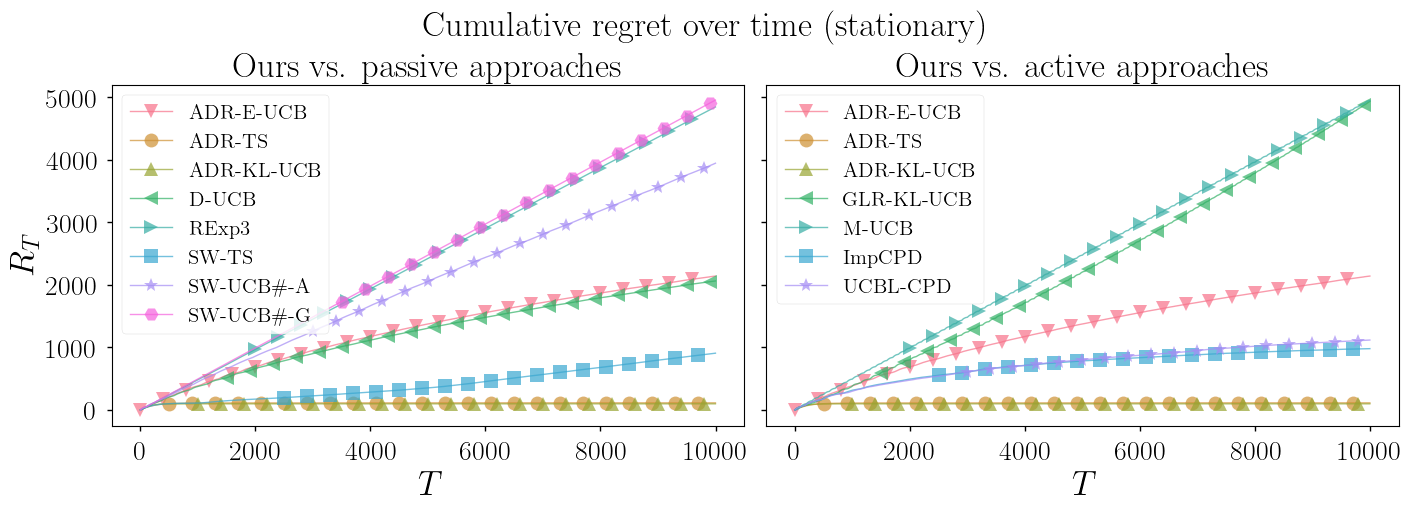

In [21]:
# L=1

#  constrained_layout=True is for reducing space
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True,  figsize=(14,5), constrained_layout=True) 

dataset = "Static"

L = 1

plt.sca(axes[0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "OS"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_pass:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, marker=markers[i], 
                             alpha=0.7, markevery=(i*500,400), markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1)
plt.ylabel("$R_T / L$")
#plt.title("Ours vs. passive approaches ($L = %s$)"%L)
plt.title("Ours vs. passive approaches")
plt.xlabel("$T$")
plt.ylabel("$R_T$")

plt.sca(axes[1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "OS"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_act:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, marker=markers[i], 
                             alpha=0.7, markevery=(i*500,400), markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1)
#plt.title("Ours vs. active approaches ($L = %s$)"%L)
plt.title("Ours vs. active approaches")
plt.xlabel("$T$")


#plt.tight_layout()

plt.suptitle("Cumulative regret over time (stationary)", fontsize=25)
plt.savefig("plots/%s_regret_Fig5a.pdf"%dataset)